In [171]:
#!pip install xgboost lightgbm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Sample Data
data = {
    'price': [3900, 1750, 2050, 3800, 5600, 4750, 6250, 5050, 5050, 9100, 8600],
    'bedroom': [2, 1, 1, 3, 4, 4, 5, 4, 3, 8, 7],
    'bathroom': [2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2],
    'verified': [True, False, True, True, False, False, True, True, True, False, False],
    'furnishing_Yes': [True, False, False, False, True, False, False, False, False, True, True],
    'furnishing_Partly': [False, True, True, False, False, True, True, True, True, False, False]
}

# Convert the data into a pandas DataFrame
df = pd.read_csv('real_estate_data.csv')
print(df)
# Check the data types of all columns
print(df.dtypes)

# Identify problematic columns
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str)).any() and df[col].apply(lambda x: isinstance(x, (int, float))).any():
        print(f"Mixed data types found in column: {col}")



                                                  title  \
0                   Great ROI I High Floor I Creek View   
1      Full Sea View | Beach Life | Brand New Residence   
2              Green Belt | Corner Unit | Spacious Plot   
3              2BR+Study | Near Pool and Park | Private   
4                Vacant | Well Maintained | Area Expert   
...                                                 ...   
5053  07 Layout | Handover Q2 2025 | Multiple Units ...   
5054    Emaar | Waterfront Apartment | 10% DP | 5-Yr PP   
5055            Upgraded | Spacious With Private Garden   
5056  10 Series | Full Sea, Burj Khalifa View Exclusive   
5057     Family Home | Unique Design | Attracrive Price   

                                         displayAddress bathrooms bedrooms  \
0                  Binghatti Canal, Business Bay, Dubai         3        2   
1               La Vie, Jumeirah Beach Residence, Dubai         3        2   
2               La Rosa 6, Villanova, Dubai Land, Dubai  

In [172]:
# Inspect unique values in 'sizeMin' to understand the issue
df['bathrooms'] = df['bathrooms'].astype(str)
df['bathrooms'] = df['bathrooms'].str.replace(r'[^0-9.]', '', regex=True)
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
# Calculate the mean of the 'bathrooms' column
mean_bathrooms = df['bathrooms'].mean()

# Round the mean to the nearest integer
rounded_mean_bathrooms = round(mean_bathrooms)

# Print the result
print(f"The rounded mean of bathrooms is: {rounded_mean_bathrooms}")


# Fill any missing 'bathrooms' values with the rounded mean# Fill missing 'bathrooms' values with the rounded mean without using inplace
df['bathrooms'] = df['bathrooms'].fillna(rounded_mean_bathrooms)
df['bathrooms'] = df['bathrooms'].round()
df['bathrooms'] = df['bathrooms'].round().astype(int)
df['bathrooms'].unique()

# Check the data types of all columns
print(df.dtypes)

# Identify problematic columns
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str)).any() and df[col].apply(lambda x: isinstance(x, (int, float))).any():
        print(f"Mixed data types found in column: {col}")


The rounded mean of bathrooms is: 3
title             object
displayAddress    object
bathrooms          int64
bedrooms          object
addedOn           object
type              object
price              int64
verified            bool
priceDuration     object
sizeMin           object
furnishing        object
description       object
dtype: object
Mixed data types found in column: bedrooms
Mixed data types found in column: furnishing
Mixed data types found in column: description


In [173]:
df['sizeMin'].unique()
df['sizeMin'] = df['sizeMin'].astype(str)
df['sizeMin'] = df['sizeMin'].str.replace(r'[^0-9.]', '', regex=True)
df['sizeMin'] = pd.to_numeric(df['sizeMin'], errors='coerce')
df['sizeMin'] = df['sizeMin'].fillna(df['sizeMin'].mean())

# Check the data types of all columns
print(df.dtypes)

# Identify problematic columns
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str)).any() and df[col].apply(lambda x: isinstance(x, (int, float))).any():
        print(f"Mixed data types found in column: {col}")

title             object
displayAddress    object
bathrooms          int64
bedrooms          object
addedOn           object
type              object
price              int64
verified            bool
priceDuration     object
sizeMin            int64
furnishing        object
description       object
dtype: object
Mixed data types found in column: bedrooms
Mixed data types found in column: furnishing
Mixed data types found in column: description


In [174]:
# Fill missing values in 'price' and 'sizeMin' columns with their respective means
df['price'] = df['price'].fillna(df['price'].mean())

df['bedrooms'] = df['bedrooms'].astype(str)
df['bedrooms'] = df['bedrooms'].str.replace(r'[^0-9.]', '', regex=True)
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['bedrooms'] = df['bedrooms'].fillna(df['sizeMin'].mean())
df['bedrooms'] = df['bedrooms'].replace(2550, 1)
df['bedrooms'] = df['bedrooms'].round()
df['bedrooms'] = df['bedrooms'].round().astype(int)
df['bedrooms'].unique()

# Check the data types of all columns
print(df.dtypes)

# Identify problematic columns
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str)).any() and df[col].apply(lambda x: isinstance(x, (int, float))).any():
        print(f"Mixed data types found in column: {col}")

title             object
displayAddress    object
bathrooms          int64
bedrooms           int64
addedOn           object
type              object
price              int64
verified            bool
priceDuration     object
sizeMin            int64
furnishing        object
description       object
dtype: object
Mixed data types found in column: furnishing
Mixed data types found in column: description


In [187]:
# One-hot encoding for 'furnishing'
#df = pd.get_dummies(df, columns=['furnishing'], drop_first=False)
# Check the transformed DataFrame
df.head()

# Check the data types of all columns
print(df.dtypes)

# Identify problematic columns
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str)).any() and df[col].apply(lambda x: isinstance(x, (int, float))).any():
        print(f"Mixed data types found in column: {col}")

title                 object
displayAddress        object
bathrooms              int64
bedrooms               int64
addedOn               object
type                  object
price                  int64
verified               int64
priceDuration         object
sizeMin                int64
description           object
furnishing_NO          int64
furnishing_PARTLY      int64
furnishing_YES         int64
log_price            float64
dtype: object
Mixed data types found in column: description


Skewness of log-transformed price: 0.6406352907954003


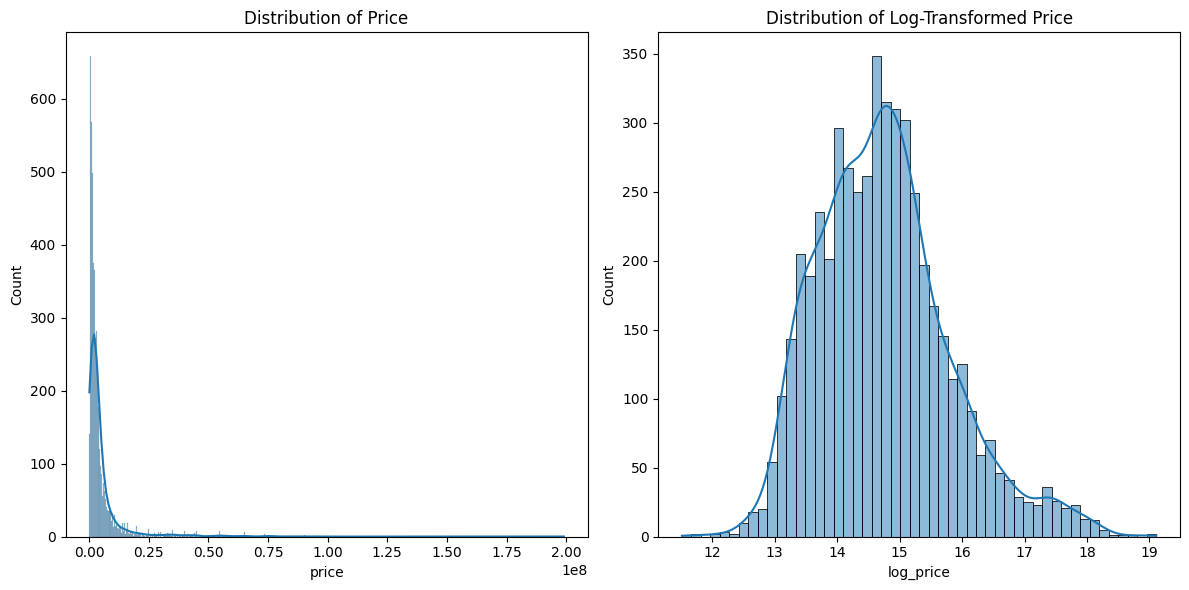

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
df['log_price'] = np.log1p(df['price'])  # Using log1p to handle any potential zero values safely

# Check skewness of the log-transformed price
log_skewness = df['log_price'].skew()
print(f"Skewness of log-transformed price: {log_skewness}")

# Plot the distribution of 'price' and 'log_price'
plt.figure(figsize=(12, 6))

# Plot the distribution of 'price' before log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')

# Plot the distribution of 'log_price' after log transformation
plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-Transformed Price')

plt.tight_layout()
plt.show()


In [195]:
# Convert boolean columns to integers (True=1, False=0)
df['verified'] = df['verified'].astype(int)
df['furnishing_YES'] = df['furnishing_YES'].astype(int)
df['furnishing_PARTLY'] = df['furnishing_PARTLY'].astype(int)
df['furnishing_NO'] = df['furnishing_NO'].astype(int)

df = df[['bedrooms','bathrooms','verified','sizeMin','furnishing_NO','furnishing_PARTLY','furnishing_YES', 'log_price','price']]
# Features and target variable
X = df[['bedrooms','bathrooms','verified','sizeMin','furnishing_NO','furnishing_PARTLY','furnishing_YES']]
y = df['log_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Initialize the Random Forest Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

rmse = np.sqrt(mse)

skewness = df['price'].skew()
print(f"Skewness of price: {skewness}")

print(f"RMSE: {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"Adjusted R-squared: {adj_r2}")

Skewness of price: 6.790976230067193
RMSE: 0.5455631114255658
Mean Squared Error: 0.2976391085483443
R-squared: 0.7346780890808218
MAE: 0.41509867024802727
Adjusted R-squared: 0.7342182590792288


In [193]:
import pandas as pd

# Define a sample input to test the model
test_input = {
    "bedrooms": [3],
    "bathrooms": [2],
    "verified": [1],  # True in integer form
    "sizeMin": [1500], # True in integer form
    "furnishing_NO": [0], # True in integer form
    "furnishing_PARTLY": [1],  # True in integer form
    "furnishing_YES": [0]  # False in integer form
    
}

# Convert the test input to a pandas DataFrame with proper column names
test_df = pd.DataFrame(test_input)

# Make a prediction
log_predicted_price = model.predict(test_df)

predicted_price = np.exp(log_predicted_price)

print(f"Log_Predicted Price: {log_predicted_price}")
# Print the prediction
print(f"Test Input: {test_input}")
print(f"Actual Predicted Price: {round(predicted_price[0], 2)}")


Log_Predicted Price: [14.91098998]
Test Input: {'bedrooms': [3], 'bathrooms': [2], 'verified': [1], 'sizeMin': [1500], 'furnishing_NO': [0], 'furnishing_PARTLY': [1], 'furnishing_YES': [0]}
Actual Predicted Price: 2990616.1


In [196]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [1]:
#!pip install FASTAPI
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load the pre-trained model
model = joblib.load('model.pkl')

# Initialize FastAPI app
app = FastAPI()

# Define the input structure using Pydantic
class InputData(BaseModel):
    bedrooms: int
    bathrooms: int
    verified: int
    sizeMin: int
    furnishing_NO: int
    furnishing_PARTLY: int
    furnishing_YES: int

# Define the prediction endpoint
@app.post("/predict/")
async def predict(input_data: InputData):
    # Prepare the input data in the same format as the model's input
    input_dict = input_data.dict()
    
    # Convert input data into a numpy array
    input_array = np.array([[input_dict['bedrooms'], input_dict['bathrooms'], 
                             input_dict['verified'], input_dict['sizeMin'], 
                             input_dict['furnishing_NO'], input_dict['furnishing_PARTLY'], 
                             input_dict['furnishing_YES']]])
    
    # Get the predicted log price
    log_predicted_price = model.predict(input_array)
    
    # Reverse the log transformation (take exponential)
    predicted_price = np.exp(log_predicted_price[0])
    
    return {"predicted_price": predicted_price}



FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [3]:
import sklearn
sklearn.__version__

'1.6.0'